In [369]:
import pandas as pd
import yfinance as yf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, r2_score, classification_report, confusion_matrix, mean_squared_error

In [370]:
transform_to_csv = yf.download('BTC-USD', start='2020-01-01', end='2025-07-27', interval='1d')

transform_to_csv.to_csv("dataset/bitcoin_dataset.csv")
file_path = 'dataset/bitcoin_dataset.csv'
df = pd.read_csv(file_path)

df.head()

C:\Users\acer\AppData\Local\Temp\ipykernel_16668\308980421.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  transform_to_csv = yf.download('BTC-USD', start='2020-01-01', end='2025-07-27', interval='1d')
[*********************100%***********************]  1 of 1 completed


,Price,Close,High,Low,Open,Volume
0,Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
1,Date,NaN,NaN,NaN,NaN,NaN
2,2020-01-01,7200.17431640625,7254.33056640625,7174.9443359375,7194.89208984375,18565664997
3,2020-01-02,6985.47021484375,7212.1552734375,6935.27001953125,7202.55126953125,20802083465
4,2020-01-03,7344.88427734375,7413.71533203125,6914.99609375,6984.4287109375,28111481032


In [371]:
df['Date'] = df['Price']
df = df.drop(index=[0,1], columns='Price')
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Close,High,Low,Open,Volume,Date
2,7200.17431640625,7254.33056640625,7174.9443359375,7194.89208984375,18565664997,2020-01-01
3,6985.47021484375,7212.1552734375,6935.27001953125,7202.55126953125,20802083465,2020-01-02
4,7344.88427734375,7413.71533203125,6914.99609375,6984.4287109375,28111481032,2020-01-03
5,7410.65673828125,7427.3857421875,7309.51416015625,7345.37548828125,18444271275,2020-01-04
6,7411.3173828125,7544.4970703125,7400.53564453125,7410.45166015625,19725074095,2020-01-05


In [372]:
df.shape

(2032, 6)

In [373]:
df.isna().sum()

Close     0
High      0
Low       0
Open      0
Volume    0
Date      0
dtype: int64

In [374]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2032 entries, 2 to 2033
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Close   2032 non-null   object        
 1   High    2032 non-null   object        
 2   Low     2032 non-null   object        
 3   Open    2032 non-null   object        
 4   Volume  2032 non-null   object        
 5   Date    2032 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 95.4+ KB


In [375]:
df.describe()

,Date
count,2032
mean,2022-10-12 12:00:00
min,2020-01-01 00:00:00
25%,2021-05-22 18:00:00
50%,2022-10-12 12:00:00
75%,2024-03-03 06:00:00
max,2025-07-24 00:00:00


In [376]:
#FFEATURE CONVERSION

df['Close'] = df['Close'].astype(float)
df['Open'] = df['Open'].astype(float)
df['High'] = df['High'].astype(float)
df['Low'] = df['Low'].astype(float)
df['Volume'] = df['Volume'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2032 entries, 2 to 2033
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Close   2032 non-null   float64       
 1   High    2032 non-null   float64       
 2   Low     2032 non-null   float64       
 3   Open    2032 non-null   float64       
 4   Volume  2032 non-null   float64       
 5   Date    2032 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5)
memory usage: 95.4 KB


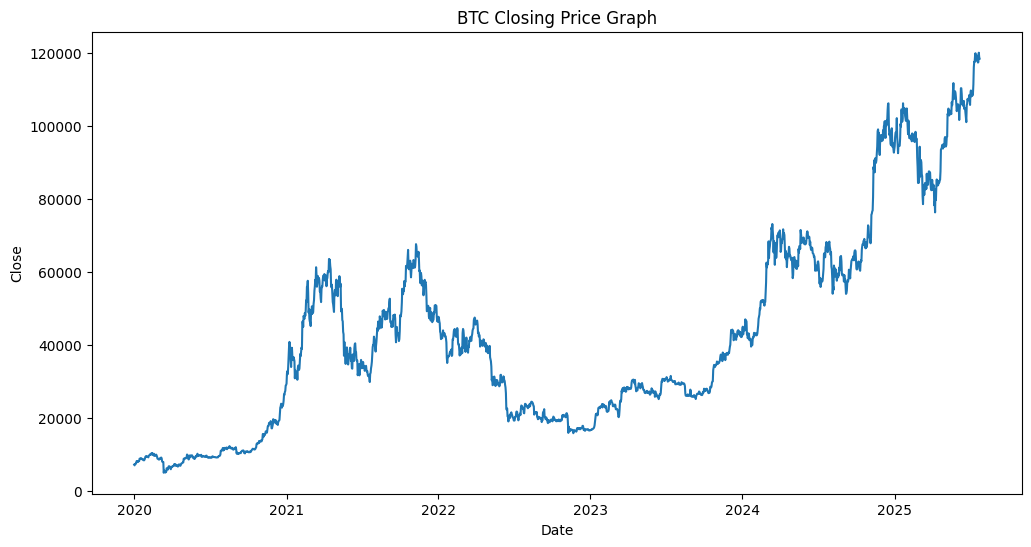

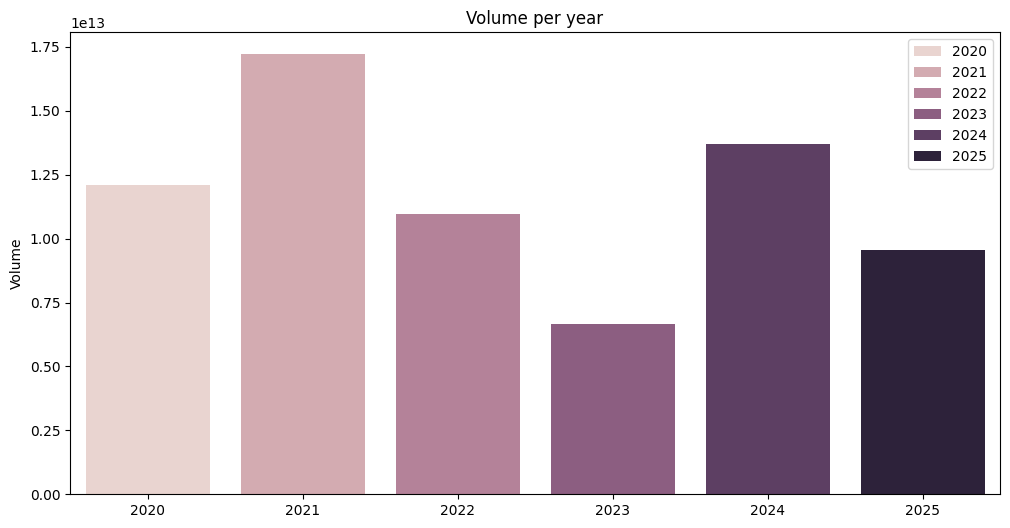

In [377]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date',y='Close',data=df)

plt.title('BTC Closing Price Graph')

#this code came from gpt lol
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.show()


#FEATURE ENGINEERED TO SHOW BAR AND LINE GRAPH
df['Year'] = df['Date'].dt.year

year_only = df['Year'].unique()

volum_per_year = df.groupby('Year')['Volume'].sum()

plt.figure(figsize=(12, 6))
sns.barplot(x=year_only,y=volum_per_year, hue=year_only)

plt.title('Volume per year')
plt.show()

In [ ]:
"""
The graph shows how digital era emerge during pandemic,
pre pandemic: 2020
-it describes normal and stable market volume

mid pandemic: 2021-2022
-shows how many people started to merge with digital era, stares in front of the computer all day

post pandemic: 2023
-approaches the end of an era

after pandemic: 2024-present
-market stabilizes and goes back to normal
"""